In [3]:
'''
We build a simple linear model to calculate gradients using autograd and 
we'll update weights manually in the backward pass while creating our 
neural network. 

In this very simple demo, we'll manually 
construct a single layer neural network with ReLU activation.

We'll generate random data points that we feed into this model and 
try to fit a straight line through these data points.
'''
import numpy as np
import matplotlib.pyplot as plt
import torch


In [4]:
'''
Let's set up the training data in the variables x_train and y_train. 
Both of these are just randomly generated data points. 
X forms the features or the input to our machine learning model, 
and y is the actual labels. 
'''
x_train = np.array ([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042] , 
                    [10.791], [5.313], [7.997], [3.1]],
                    dtype = np.float32)

y_train = np.array ([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366],  [2.596], [2.53], [1.221], [2.827] , 
                    [3.465], [1.65], [2.904], [1.3]], 
                    dtype = np.float32)

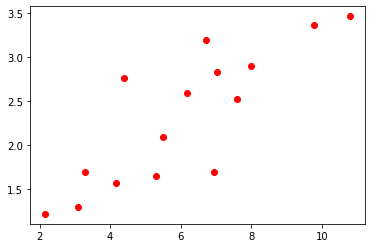

In [5]:
#We want to try and fit a straight line through these points, 
# that is our linear regression. 
plt.plot(x_train,y_train,'ro',label='Original Data')

In [6]:
'''
In order to work with X data and Y data, we need to convert these 
NumPy arrays to tensors which we can do using the torch.from_numpy function.
'''
X_train=torch.from_numpy(x_train)
Y_train=torch.from_numpy(y_train)


In [7]:
'''
We'll now print out the values of requires gradients for both 
X_train and Y_train and you can see that requires_grad, 
by default, is set to false. 

This makes sense because the requires_grad attribute needs to be 
set to true only for those variables that have to be trained 
during our training phase.

 X is our input feature, Y is our output label, these do not need to be trained.
'''
print('requires_grad for X_Train:',X_train.requires_grad)
print('requires_grad for Y_Train:',Y_train.requires_grad)

requires_grad for X_Train: False
requires_grad for Y_Train: False


In [8]:
'''
The next step is to initialize a bunch of constants for our 
single layer neural network. 

The hidden size of a single layer is 100. 
We are handcrafting a neural network with a single layer, which has 100 neurons. 

This layer will have a ReLU activation that will apply mathematically. 

The X data that we feed into a single layer neural network has just one feature, 
so it's represented by a single value, which is why input size is equal to 1. 

Our Y labels also have just one value. The output size is also equal to 1. 

In this single layer neural network, after we calculate gradients 
in the backward pass, we'll manually adjust our model weights. 

This is the learning rate that we use in every epoch when we 
apply gradients to update our model with our model parameters. 
'''
input_size=1
hidden_size=100
output_size=1
learning_rate=1e-6

In [15]:
'''
Let's initialize a random array of weights. 
W1 is the weight parameters that we have to train during the training 
phase of our neural network. 

This is a matrix of weights with shape, input size, cross hidden size. 

We want to set the requires_grad parameter for these weights to be equal to true. 

Because weights have to be adjusted during the training phase, 
they require gradients to be turned on. 

If you take a look at the shape of our weights matrix, 
it is 1 cross 100, we have 100 hidden neurons and just one feature in our input. 
'''
w1=torch.rand(input_size,hidden_size,requires_grad=True)
w1.shape
w1

tensor([[0.7537, 0.4873, 0.2343, 0.8969, 0.7226, 0.9294, 0.3411, 0.5319, 0.3677,
         0.6257, 0.7261, 0.8234, 0.0419, 0.7702, 0.9640, 0.1689, 0.2924, 0.8134,
         0.9236, 0.1646, 0.4777, 0.7759, 0.2593, 0.4757, 0.5814, 0.3912, 0.9578,
         0.9635, 0.8493, 0.1505, 0.8352, 0.0679, 0.4141, 0.5420, 0.4508, 0.4865,
         0.9987, 0.1315, 0.4127, 0.3069, 0.1077, 0.6851, 0.9573, 0.7971, 0.4653,
         0.7463, 0.0879, 0.8911, 0.7962, 0.2156, 0.8189, 0.1207, 0.1580, 0.1249,
         0.6207, 0.4405, 0.3683, 0.5150, 0.6249, 0.3567, 0.5865, 0.4546, 0.7644,
         0.5471, 0.5539, 0.6196, 0.1676, 0.1193, 0.2573, 0.6618, 0.9778, 0.6823,
         0.7813, 0.2403, 0.9639, 0.8777, 0.4545, 0.9033, 0.9336, 0.7665, 0.1611,
         0.9508, 0.0407, 0.4397, 0.9623, 0.8898, 0.8216, 0.2677, 0.7720, 0.4327,
         0.7442, 0.5561, 0.9946, 0.4693, 0.9297, 0.4272, 0.6940, 0.3357, 0.6823,
         0.8137]], requires_grad=True)

In [16]:
'''
Similarly, we set up w2 which connects the hidden layer to the output layer. 
This is a matrix of hidden_size cross output_size and it also requires gradients. 

Our output Y labels are also of dimensionality 1. This matrix is 100 cross 1. 
'''

w2=torch.rand(hidden_size,output_size,requires_grad=True)
w2.shape
w2

tensor([[0.0087],
        [0.0769],
        [0.7809],
        [0.6741],
        [0.3746],
        [0.6109],
        [0.8879],
        [0.0224],
        [0.4619],
        [0.0372],
        [0.9948],
        [0.0487],
        [0.7586],
        [0.6117],
        [0.4895],
        [0.5712],
        [0.6628],
        [0.5971],
        [0.1099],
        [0.3113],
        [0.7132],
        [0.0643],
        [0.2301],
        [0.6875],
        [0.4091],
        [0.4136],
        [0.6404],
        [0.2874],
        [0.0747],
        [0.4926],
        [0.3408],
        [0.0074],
        [0.2186],
        [0.9744],
        [0.0649],
        [0.1123],
        [0.9037],
        [0.7649],
        [0.5562],
        [0.1168],
        [0.0885],
        [0.1029],
        [0.6487],
        [0.2820],
        [0.0157],
        [0.7456],
        [0.0117],
        [0.3221],
        [0.6165],
        [0.5955],
        [0.3940],
        [0.5235],
        [0.4491],
        [0.5147],
        [0.1932],
        [0

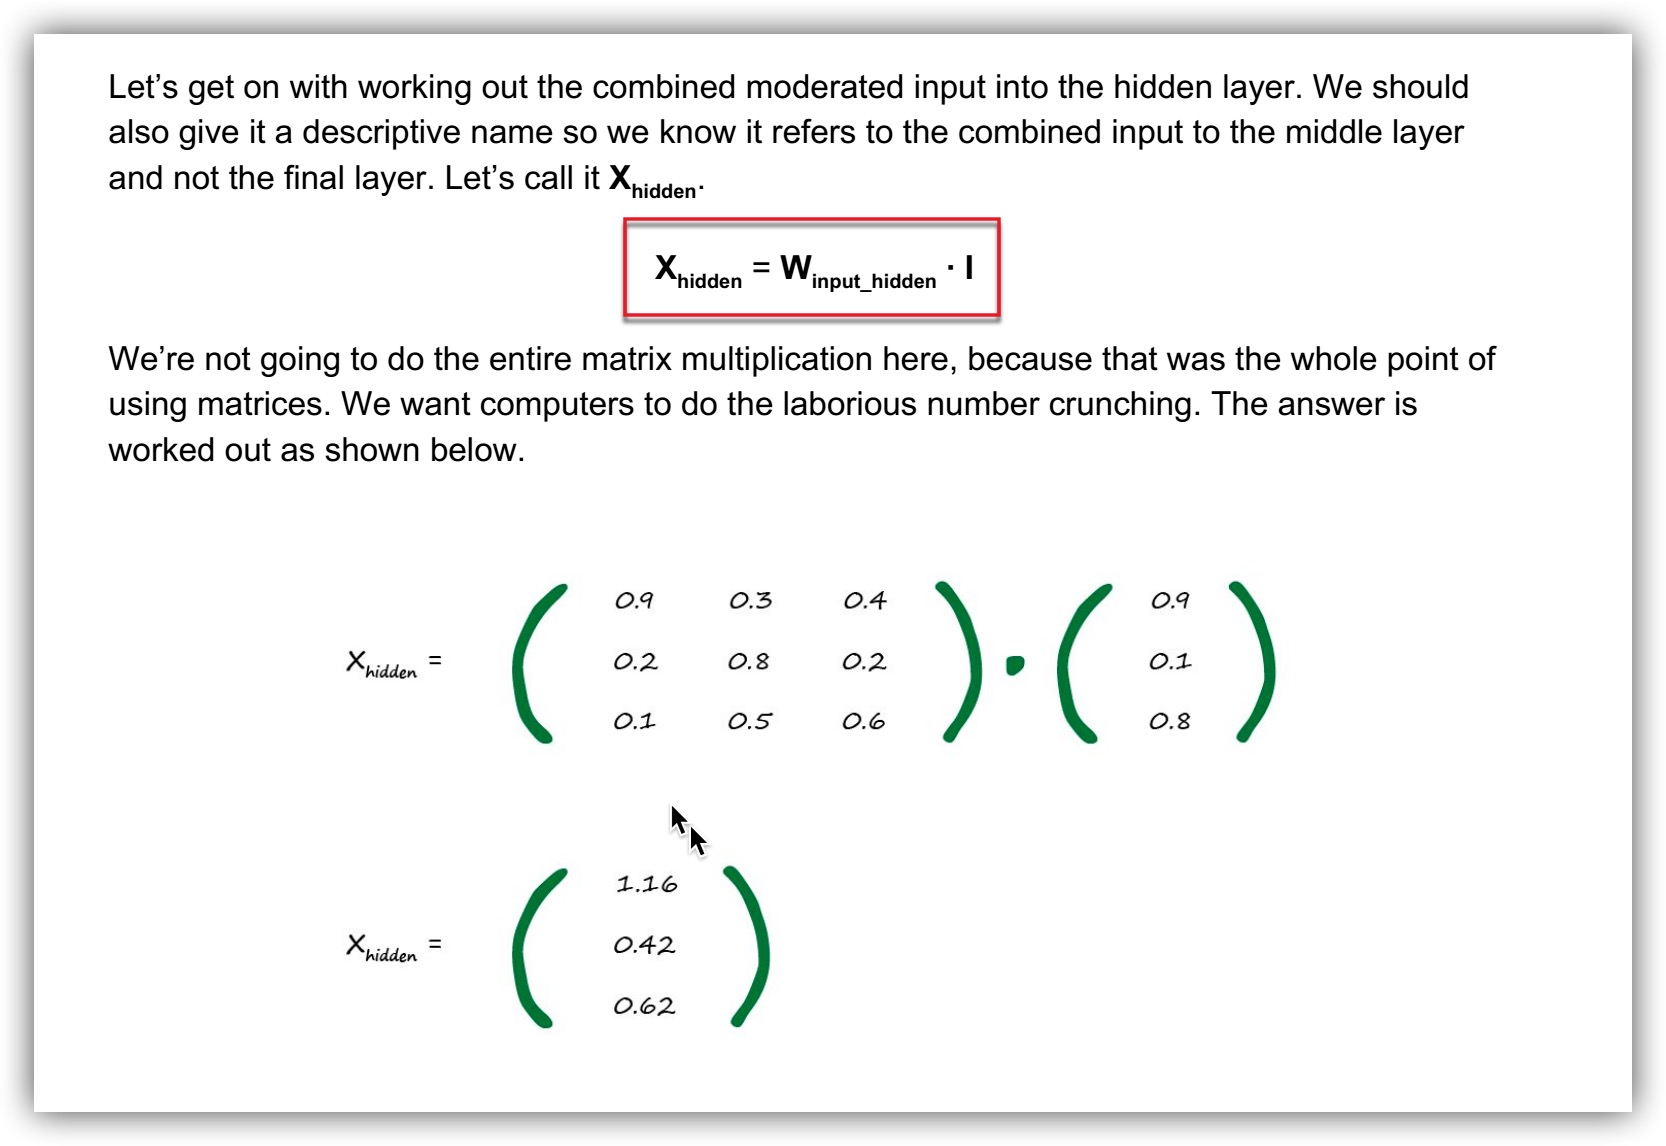

In [25]:
from IPython.display import Image
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/Pluralsight/Janani Ravi/Building Deep Learning Models Using PyTorch/SB/Image/2023-03-12_14-06-06.jpg')

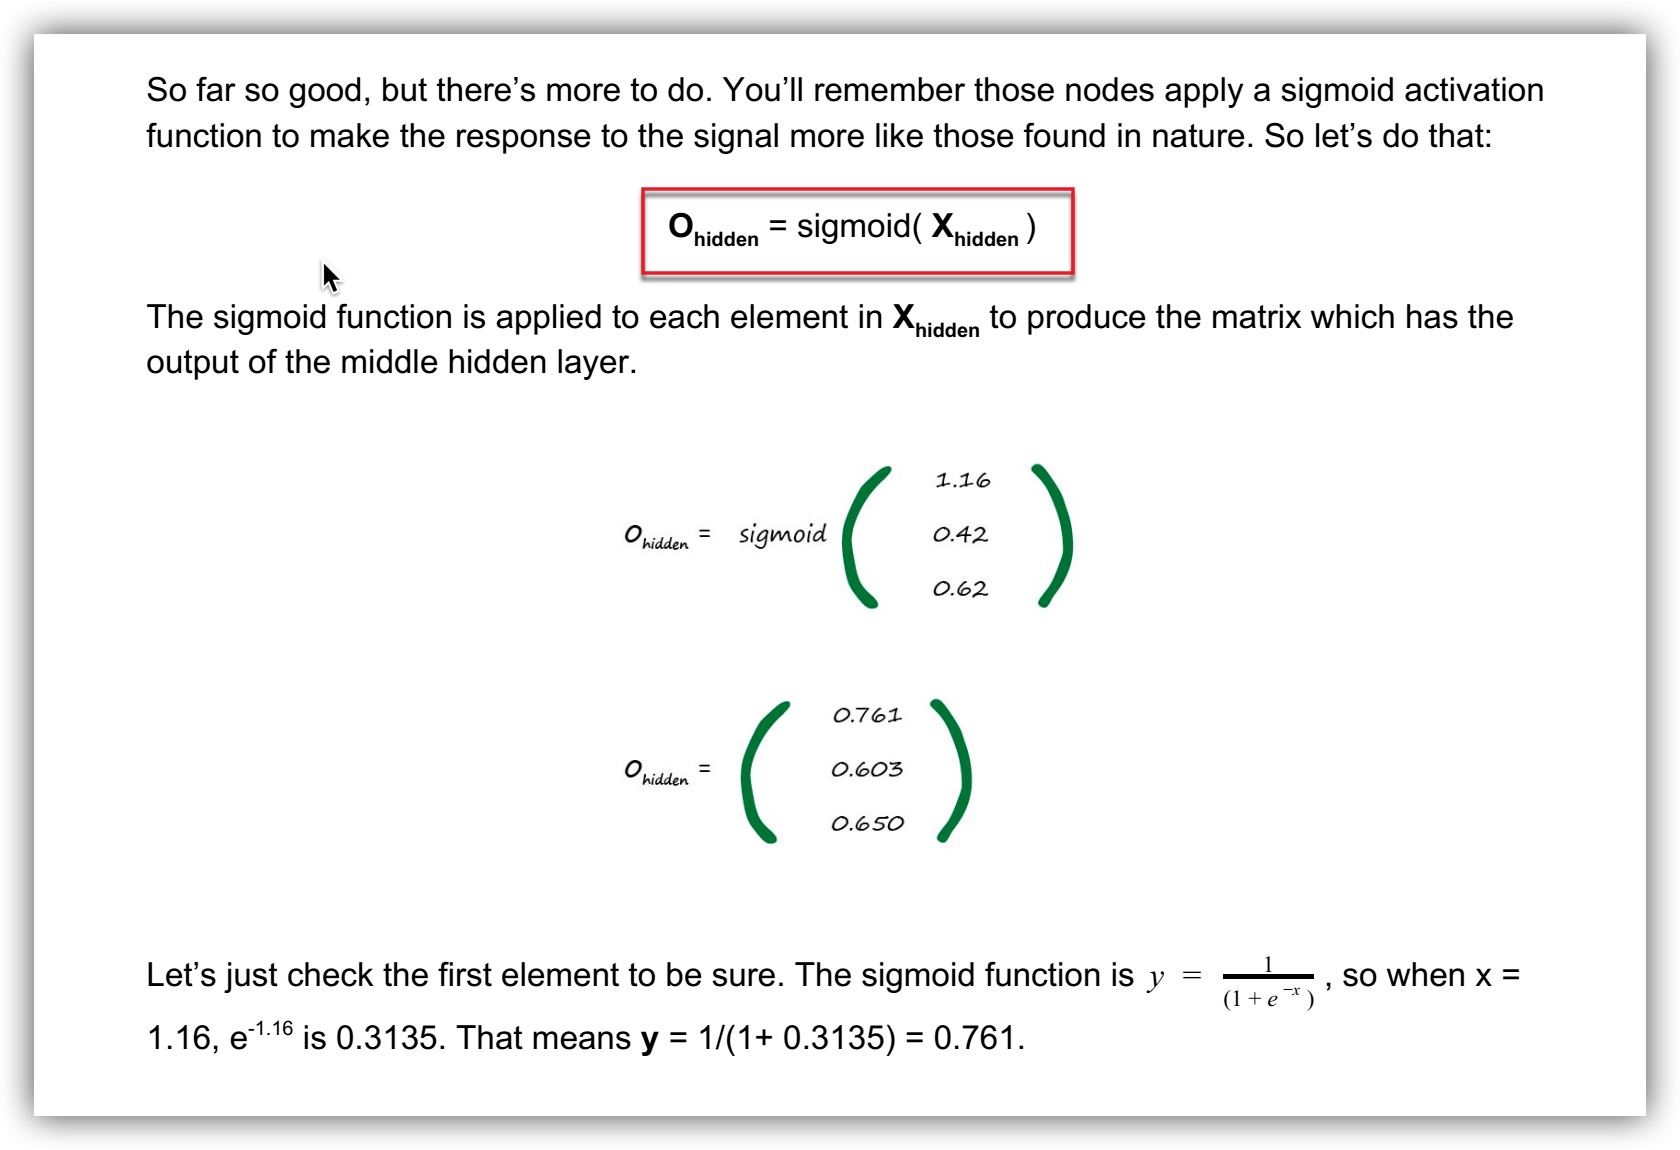

In [19]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/Pluralsight/Janani Ravi/Building Deep Learning Models Using PyTorch/SB/Image/2023-03-12_14-07-47.jpg')

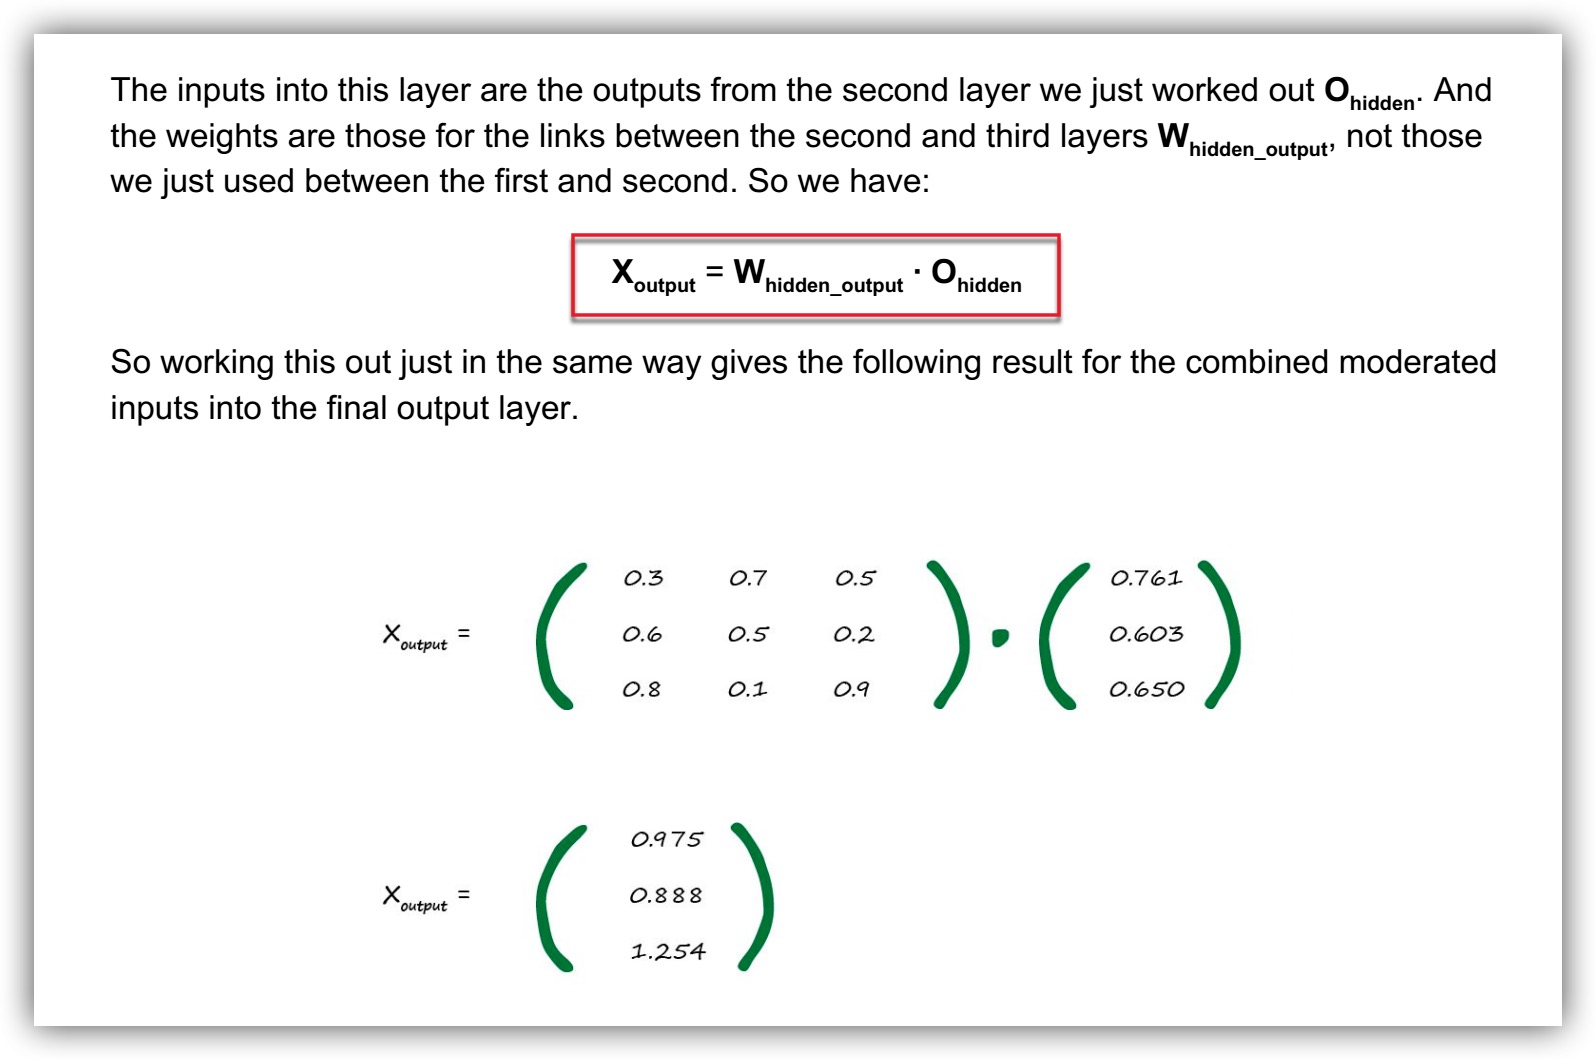

In [20]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/Pluralsight/Janani Ravi/Building Deep Learning Models Using PyTorch/SB/Image/2023-03-12_14-09-07.jpg')

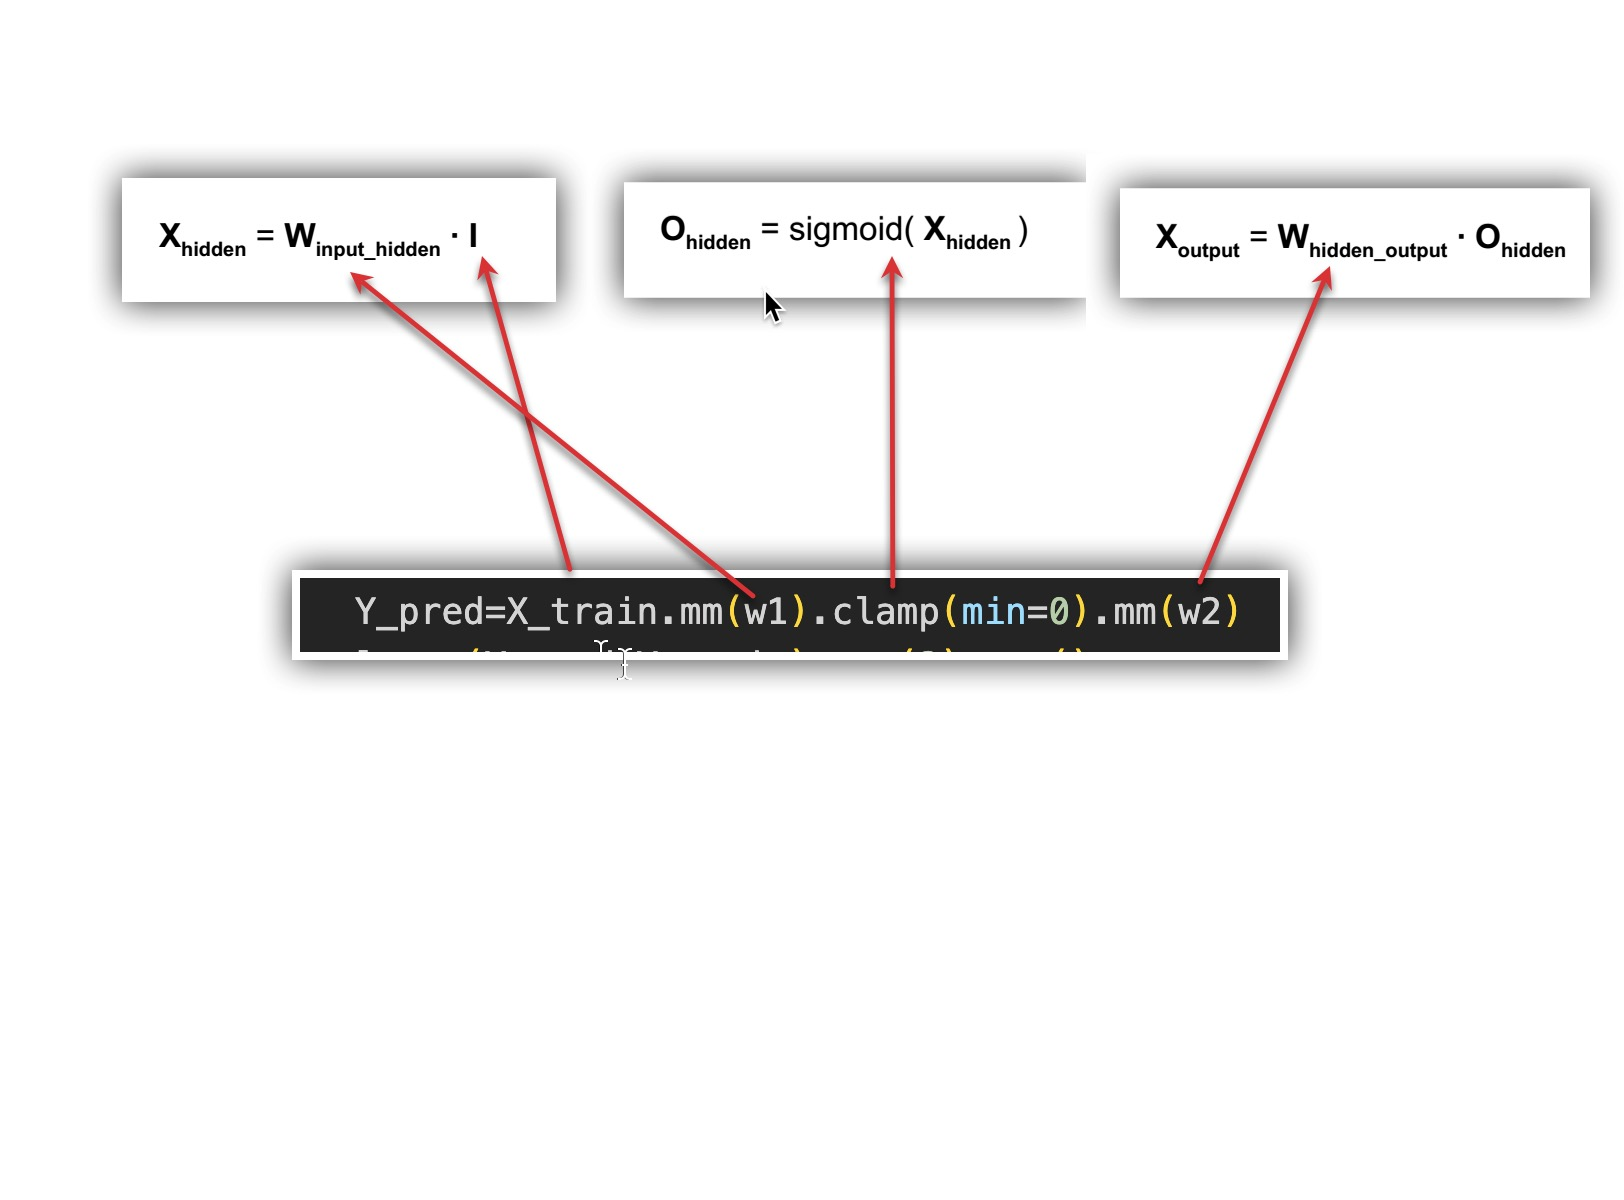

In [21]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/Pluralsight/Janani Ravi/Building Deep Learning Models Using PyTorch/SB/Image/2023-03-12_14-11-11.jpg')

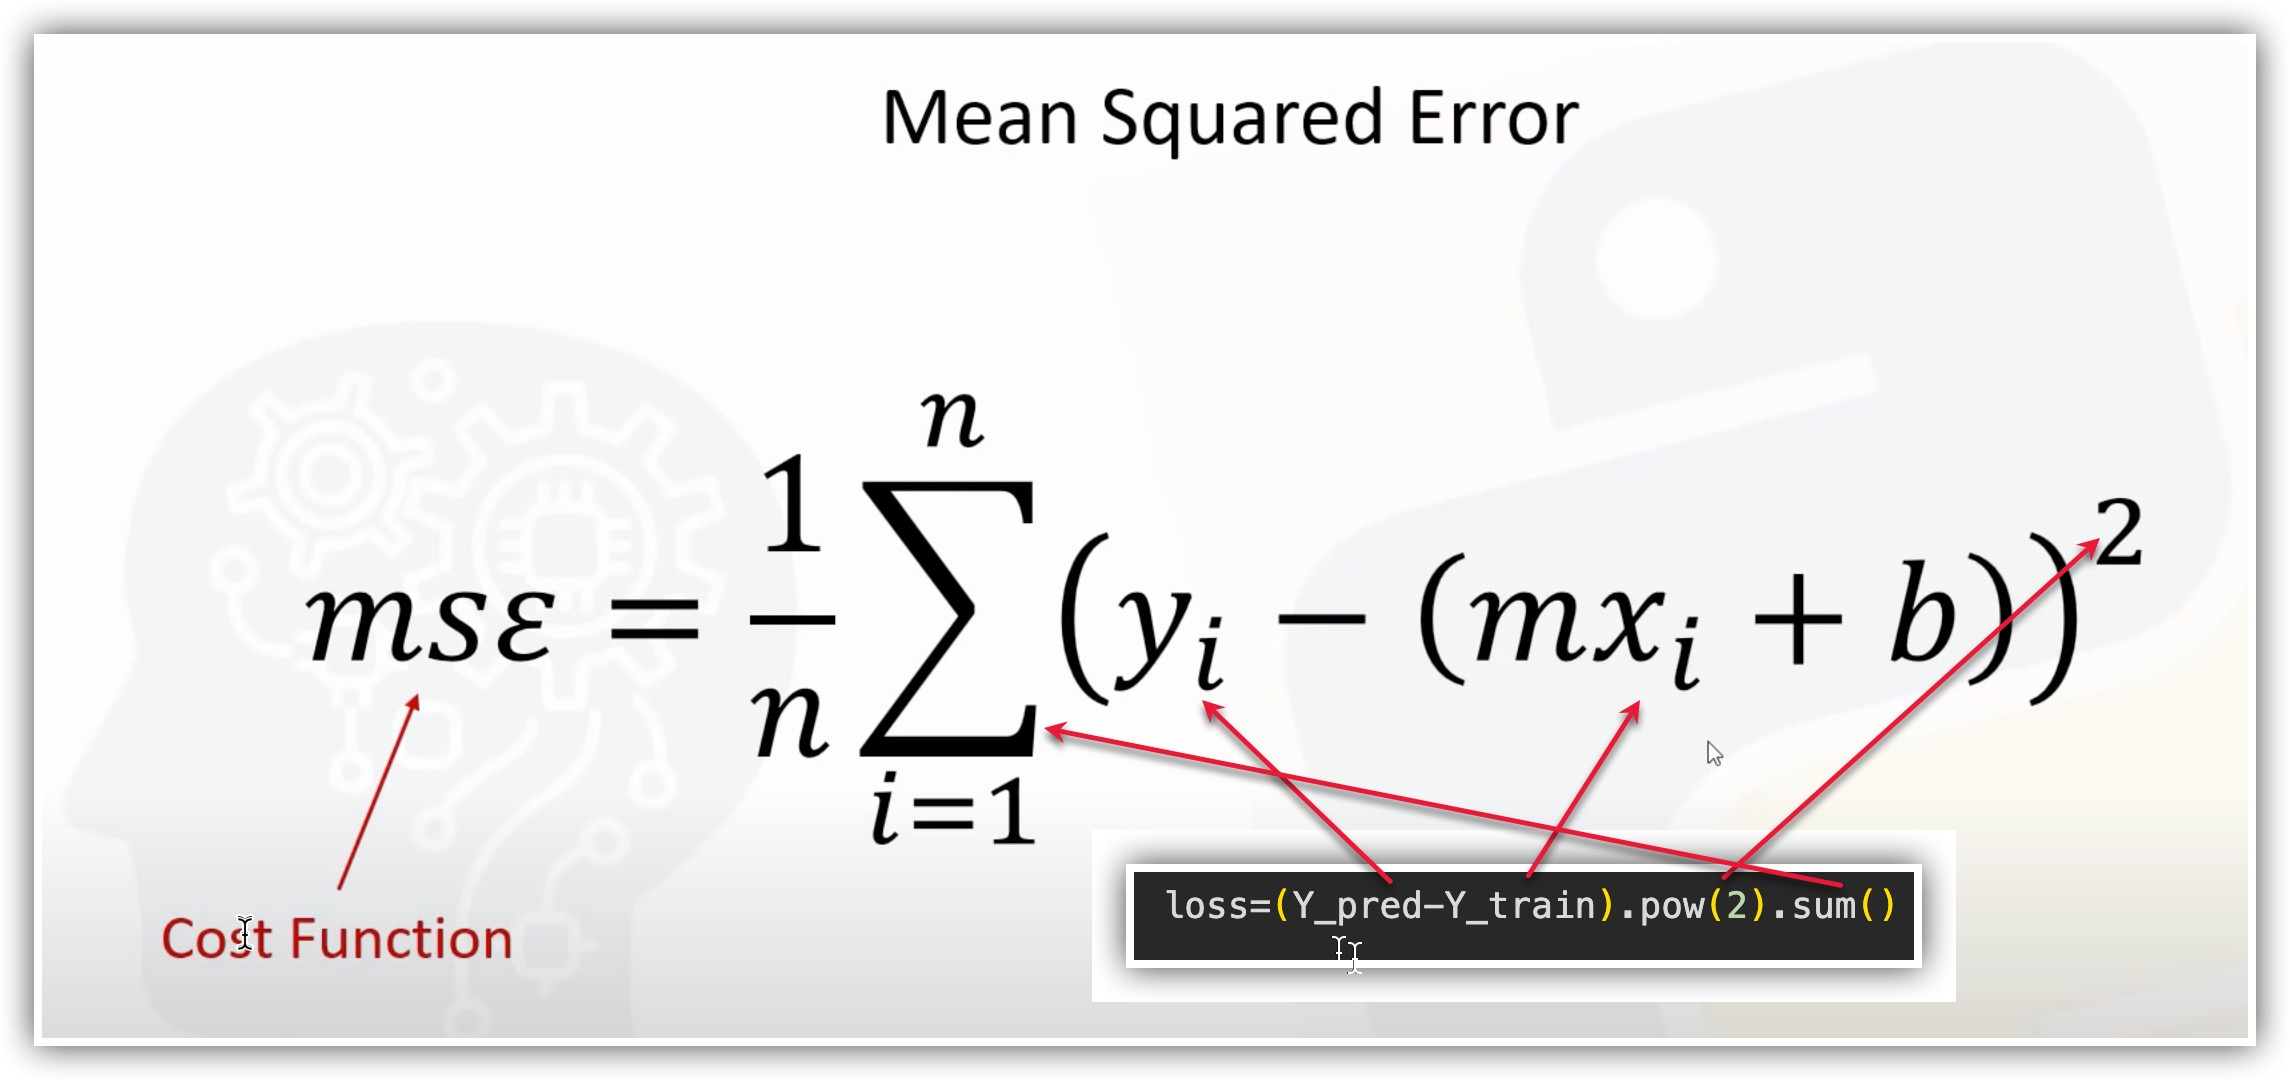

In [23]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/Pluralsight/Janani Ravi/Building Deep Learning Models Using PyTorch/SB/Image/2023-03-12_14-19-59.jpg')

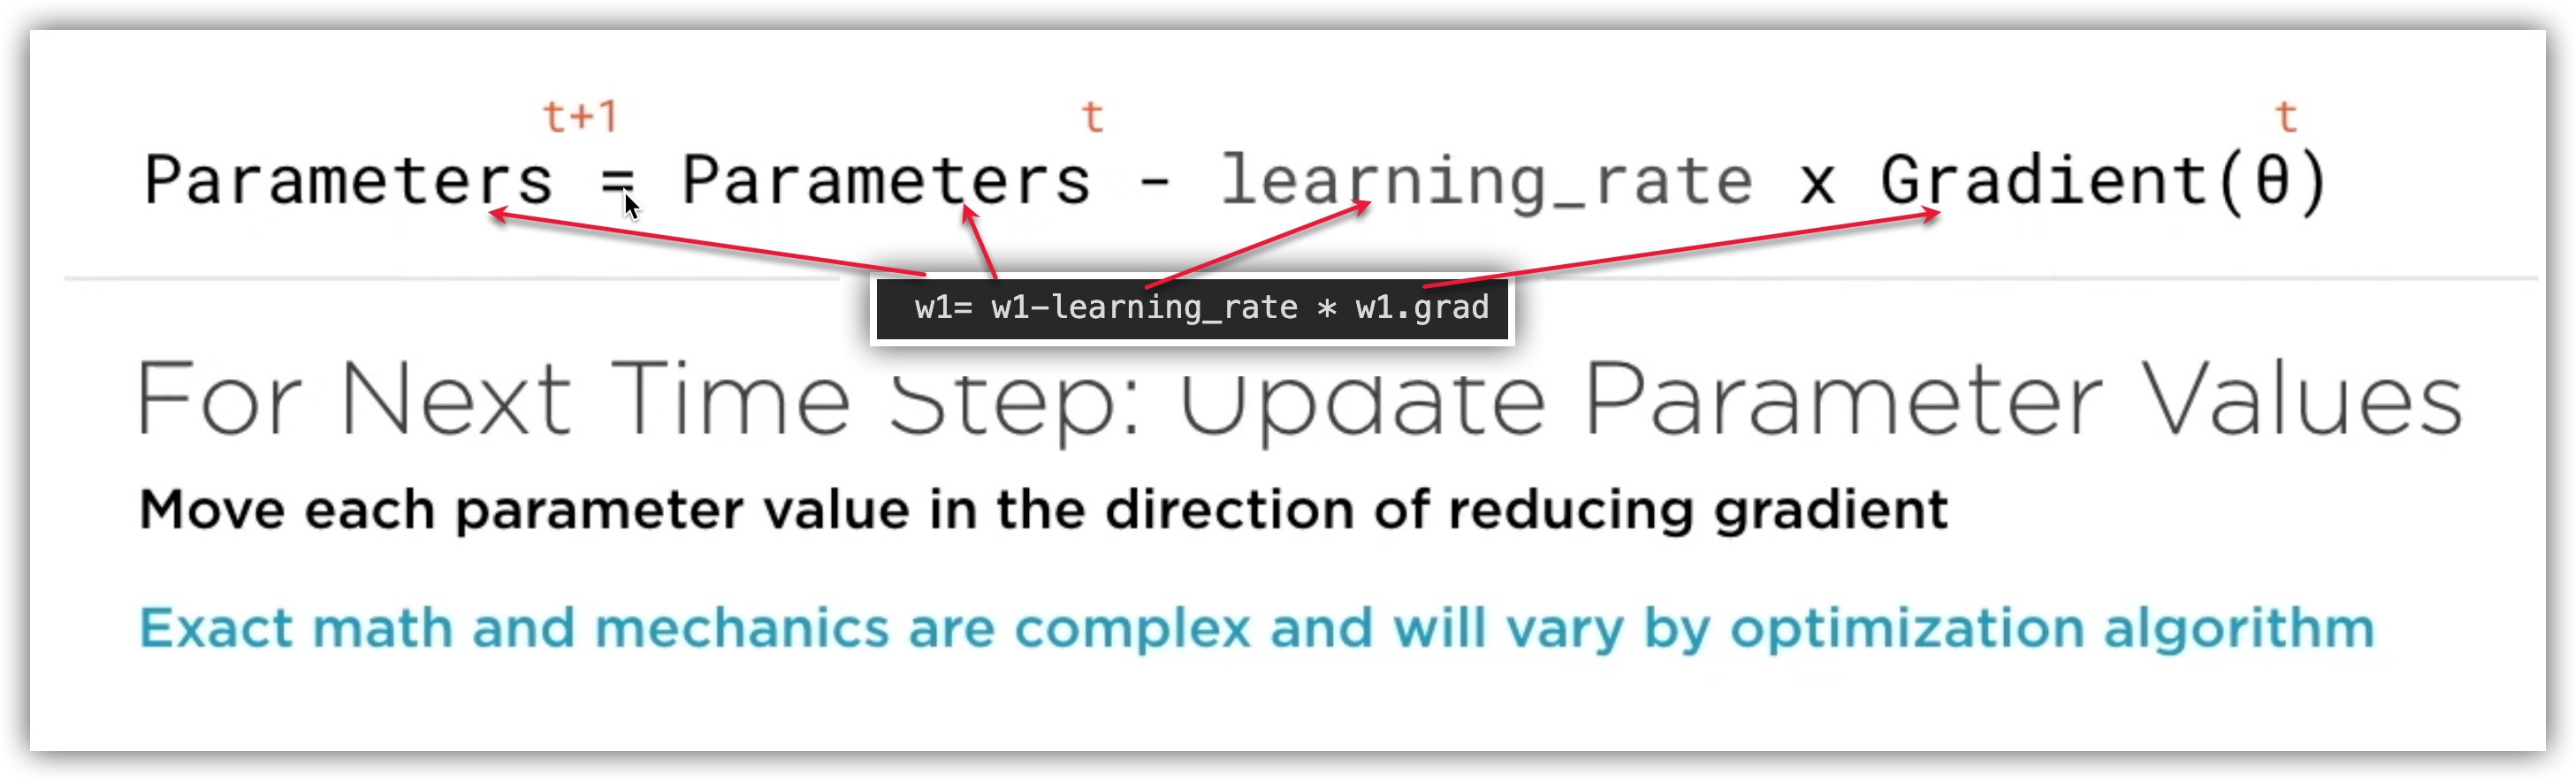

In [24]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/Pluralsight/Janani Ravi/Building Deep Learning Models Using PyTorch/SB/Image/2023-03-12_14-23-38.jpg')

In [38]:
'''
We'll run training for 300 epochs, that is 300 passes to our data site. 

And here is our manually crafted single layer neural network. 

We first apply the activation function and then the ReLU affine transformation. 

The affine transformation operation within the neuron involves multiplying 
our X input by the weight vector's W1. 
This is a matrix multiplication operation. With this output, we then 
clamp all negative numbers to 0. This is the ReLU activation. 

We then multiply the output by the weights w2. This will give us our Ypredicted. 

Because this is a linear regression problem, let's calculate the loss here. 

The loss here is simply Ypredicted - Yactual to the power of 2 and we sum 
all of these up. 
This is the mean square error. 

As we run training for this very simple neural network, 
every 50 iterations we'll print out the value of loss to see how it converges. 

Once a single forward pass is complete using the current model parameters, 
we call lost.backward to initiate the backward pass where we calculate 
the gradients. 

The loss.backward function uses the autograd library in PyTorch in order 
to automatically calculate gradients. 

All computations which are being tracked by autograd which have a 
requires_grad set to true, we'll compute the gradient of loss with 
respect to all of these tensors. 

This is what it means to have gradients calculated for those tensors. 
Once gradients have been computed, we manually update the model weights. 

This is a process of tweaking our neural network in order to make 
better predictions. 

When we're adjusting the model parameters or the model weights, 
we don't need gradients to be turned on so we stop autograd 
tracking history on these tensors with torch.no_grad. 

We then find new values for the weights w1 and w2 by multiplying 
the learning rate by the gradients of w1 and w2 and subtracting them 
from the original parameters. 

This mathematical computation is the equivalent of the formula 
that we had studied in the previous clip. 

Once the model weights have been adjusted, we zero out the gradients 
on the weights in order to get it ready for the next forward pass. 

 When you execute this bit of code, our model will be trained for 300 epochs 
 and you can see how the loss reduces as we train our model. 
 
 At this point, w1 and w2 hold the final model parameters of our very 
 simple linear model, just a single layer of 100 neurons. 
'''
for iter in range(1,301):
    Y_pred=X_train.mm(w1).clamp(min=0).mm(w2)
    loss=(Y_pred-Y_train).pow(2).sum()
    
    if iter % 50 == 0:
        print(iter,loss.item())
    
    loss.backward()
    
    with torch.no_grad():
        w1-=learning_rate * w1.grad
        w2-=learning_rate * w2.grad
        
        w1.grad.zero_()
        w2.grad.zero_()

50 1842.058349609375
100 26.38669776916504
150 3.9378817081451416
200 3.6367757320404053
250 3.632685422897339
300 3.6326277256011963


In [39]:
print('w1:',w1)
print('w2:',w2)

w1: tensor([[-3.1560e-04,  3.3356e-01,  7.3282e-01, -1.4481e-03, -2.0805e-03,
          3.6649e-01,  9.8294e-01,  2.5269e-01,  9.6444e-01, -4.8585e-03,
         -1.5127e-03,  5.7486e-01,  4.3854e-01,  6.2570e-01,  1.0081e+00,
          4.1972e-01, -4.4108e-04,  5.8948e-01,  1.7107e-01,  8.6102e-03,
         -7.5084e-05,  3.0871e-01,  3.7082e-01,  4.6243e-01, -1.5322e-03,
          3.1152e-01,  5.3254e-03,  1.5210e-01,  6.9640e-01,  1.0313e+00,
          7.3865e-01,  2.0708e-01,  5.6670e-01,  1.8982e-01,  7.9394e-01,
         -5.2914e-03,  2.9338e-01,  4.6493e-01,  4.1945e-03,  9.6221e-02,
          3.5912e-02,  6.7731e-01, -5.9545e-03,  7.2327e-01, -1.9073e-03,
          5.7350e-01,  7.9719e-01,  3.5006e-01,  5.7240e-01,  4.5552e-01,
          9.7670e-01,  6.4170e-01,  3.2896e-01,  7.7002e-01,  8.1564e-01,
          9.1295e-01,  7.2813e-01,  6.8322e-01,  3.5693e-01,  2.6318e-01,
          3.6246e-01, -1.5477e-03,  1.7013e-01,  3.5930e-01,  5.2988e-01,
          6.2015e-01,  6.6083e-01,

In [41]:

x_train_tensor=torch.from_numpy(x_train)
x_train_tensor

tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 3.1000]])

In [42]:
'''
In order to get the value for Ypredicted, we apply our fully-trained model weights,
 w1 and w2, with the same operation for our X input. 
 
 This will give us the Ypredicted values, the predictions from our neural network. 

'''
predicted_in_tensor=x_train_tensor.mm(w1).clamp(min=0).mm(w2)
predicted_in_tensor

tensor([[1.2116],
        [1.6155],
        [2.0193],
        [2.4636],
        [2.5444],
        [1.5303],
        [3.5904],
        [2.2697],
        [2.7867],
        [0.7956],
        [2.5855],
        [3.9619],
        [1.9507],
        [2.9361],
        [1.1382]], grad_fn=<MmBackward0>)

In [43]:
'''
 Let's convert these predicted values to a NumPy array so that we can visualize 
 this using matplotlib.

 Before converting predictions to a NumPy array, we detach the tensor 
 from the current graph so no gradients are computed on the new tensor.
'''
predicted=predicted_in_tensor.detach().numpy()
predicted

array([[1.2116008],
       [1.6154671],
       [2.0193334],
       [2.4635878],
       [2.544361 ],
       [1.5302882],
       [3.590376 ],
       [2.2697315],
       [2.7866812],
       [0.7956178],
       [2.5854816],
       [3.961936 ],
       [1.9506764],
       [2.9361143],
       [1.1381702]], dtype=float32)

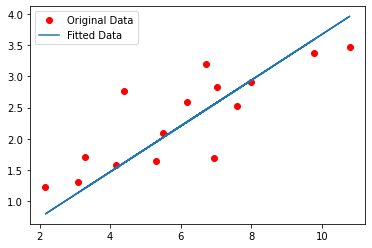

In [45]:
'''
At this point, we have the original values of X and Y, the x_train and the y_train. 
We also have the Ypredicted values. We can plot them all in matplotlib and 
we'll see that we have drawn a straight line through our data points. 

The predicted output of our linear regression model is a straight line that 
is the best possible representation of our underlying data.
'''
plt.plot(x_train,y_train,'ro',label='Original Data')

plt.plot(x_train,predicted,label='Fitted Data')

plt.legend()
plt.show()
